In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./test_images/anand.jpg')
img.shape

(500, 500, 3)

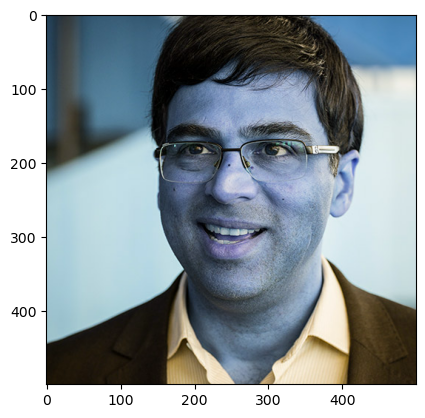

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 500)

In [8]:
gray

array([[ 67,  67,  67, ..., 135, 134, 134],
       [ 67,  67,  67, ..., 133, 134, 134],
       [ 68,  68,  68, ..., 134, 134, 134],
       ...,
       [ 22,  21,  20, ...,  28,  30,  33],
       [ 23,  22,  20, ...,  29,  30,  32],
       [ 24,  23,  21, ...,  30,  29,  31]], dtype=uint8)

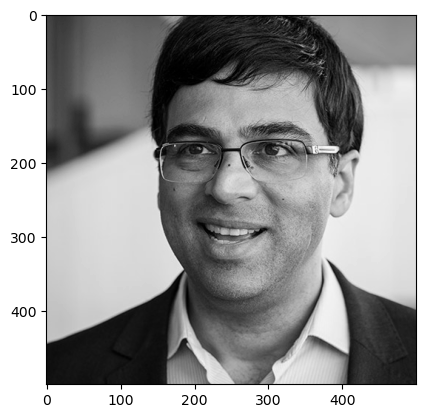

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
eye_spect_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[115,  77, 275, 275]], dtype=int32)

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(115, 77, 275, 275)

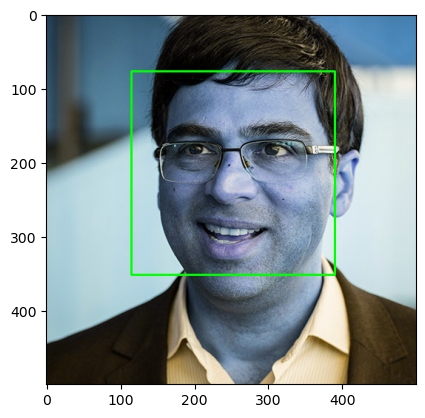

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

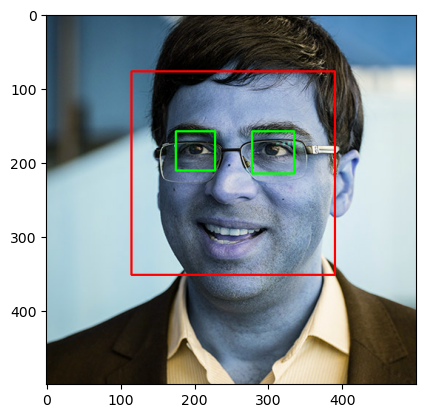

In [13]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_spect_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

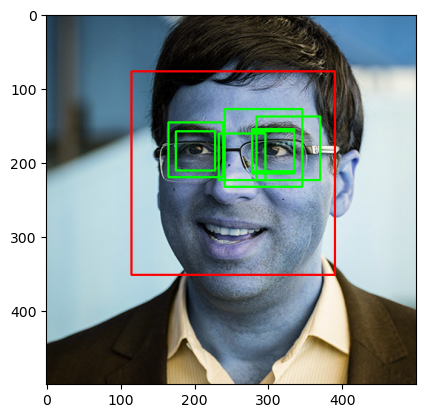

In [14]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

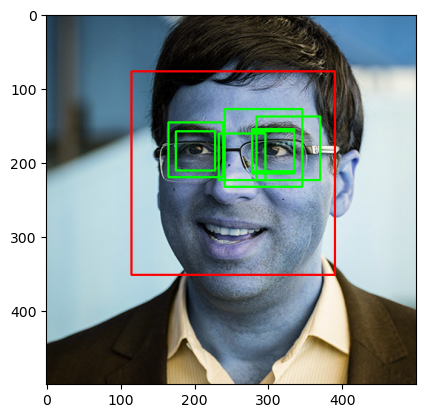

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

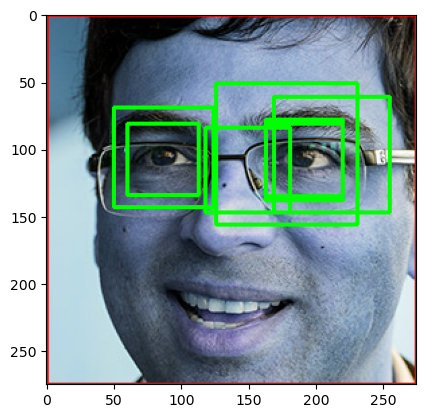

In [16]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [17]:
cropped_img = np.array(roi_color)
cropped_img.shape

(275, 275, 3)

In [18]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

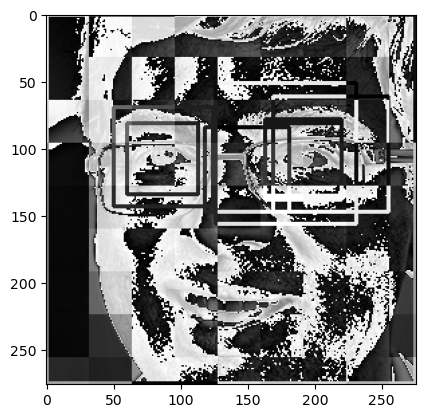

In [19]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    except:
        return None

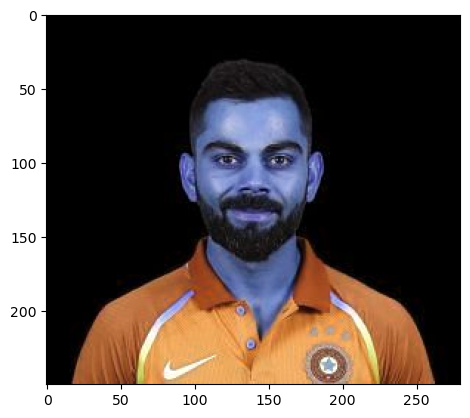

In [21]:
original_image = cv2.imread('./test_images/91b37-16741295618495-1920.jpg')
plt.imshow(original_image)

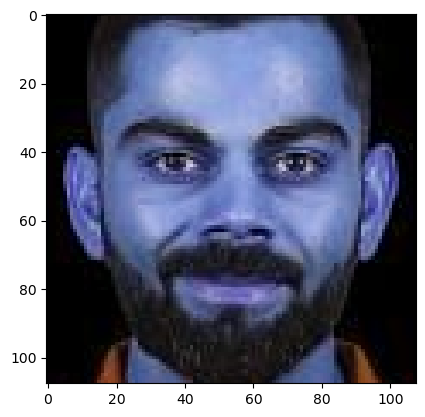

In [22]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/91b37-16741295618495-1920.jpg')
plt.imshow(cropped_image)

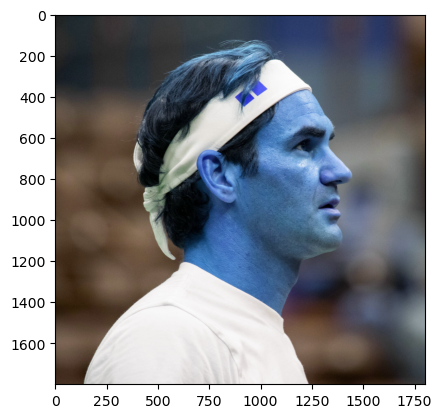

In [23]:
original_image = cv2.imread('./test_images/15federer-photos-slide-V9RG-mediumSquareAt3X.jpg')
plt.imshow(original_image)

In [24]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/15federer-photos-slide-V9RG-mediumSquareAt3X.jpg')
cropped_image

In [25]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [26]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['./dataset/virat kohli',
 './dataset/roger federer',
 './dataset/lionel messi',
 './dataset/tiger woods',
 './dataset/vishwanathan anand']

In [28]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [29]:
img_dirs

['./dataset/virat kohli',
 './dataset/roger federer',
 './dataset/lionel messi',
 './dataset/tiger woods',
 './dataset/vishwanathan anand']

In [30]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

virat kohli
roger federer
lionel messi
tiger woods
vishwanathan anand


In [31]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

virat kohli
Generating cropped images in folder:  ./dataset/cropped/virat kohli


libpng warning: iCCP: known incorrect sRGB profile


roger federer
Generating cropped images in folder:  ./dataset/cropped/roger federer
lionel messi
Generating cropped images in folder:  ./dataset/cropped/lionel messi


imread_('./dataset/lionel messi/01gx87zcm94ny6bf75k2.jpg'): can't read data: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/grfmt_jpeg2000_openjpeg.cpp:641: error: (-2:Unspecified error) in function 'virtual bool cv::detail::Jpeg2KOpjDecoderBase::readData(cv::Mat &)'
> OpenJPEG2000: tiles are not supported (expected: '(int)comp.dx == 1'), where
>     '(int)comp.dx' is 2
> must be equal to
>     '1' is 1

libpng warning: iCCP: known incorrect sRGB profile


tiger woods
Generating cropped images in folder:  ./dataset/cropped/tiger woods
vishwanathan anand
Generating cropped images in folder:  ./dataset/cropped/vishwanathan anand


In [54]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'virat kohli': ['./dataset/cropped/virat kohli/virat kohli3.png',
  './dataset/cropped/virat kohli/virat kohli76.png',
  './dataset/cropped/virat kohli/virat kohli62.png',
  './dataset/cropped/virat kohli/virat kohli63.png',
  './dataset/cropped/virat kohli/virat kohli77.png',
  './dataset/cropped/virat kohli/virat kohli2.png',
  './dataset/cropped/virat kohli/virat kohli61.png',
  './dataset/cropped/virat kohli/virat kohli75.png',
  './dataset/cropped/virat kohli/virat kohli49.png',
  './dataset/cropped/virat kohli/virat kohli48.png',
  './dataset/cropped/virat kohli/virat kohli74.png',
  './dataset/cropped/virat kohli/virat kohli60.png',
  './dataset/cropped/virat kohli/virat kohli1.png',
  './dataset/cropped/virat kohli/virat kohli5.png',
  './dataset/cropped/virat kohli/virat kohli58.png',
  './dataset/cropped/virat kohli/virat kohli64.png',
  './dataset/cropped/virat kohli/virat kohli70.png',
  './dataset/cropped/virat kohli/.DS_Store',
  './dataset/cropped/virat kohli/virat kohl

In [55]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'virat kohli': 0,
 'roger federer': 1,
 'lionel messi': 2,
 'tiger woods': 3,
 'vishwanathan anand': 4}

In [56]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [57]:
len(X[0])

4096

In [58]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(259, 4096)

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9076923076923077

In [61]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.33      0.50         3
           2       0.95      0.86      0.90        21
           3       1.00      0.83      0.91         6
           4       0.82      1.00      0.90        18

    accuracy                           0.91        65
   macro avg       0.94      0.80      0.84        65
weighted avg       0.92      0.91      0.90        65



In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [62]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [63]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.844669,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.737112,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.813765,{'logisticregression__C': 1}


In [64]:
best_estimators['svm'].score(X_test,y_test)

0.9230769230769231

In [65]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8615384615384616

In [66]:
best_clf2 = best_estimators['svm']

In [67]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, best_clf2.predict(X_test))
cm2

array([[17,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  1],
       [ 0,  0, 19,  0,  2],
       [ 0,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 18]])

Text(95.72222222222221, 0.5, 'Truth')

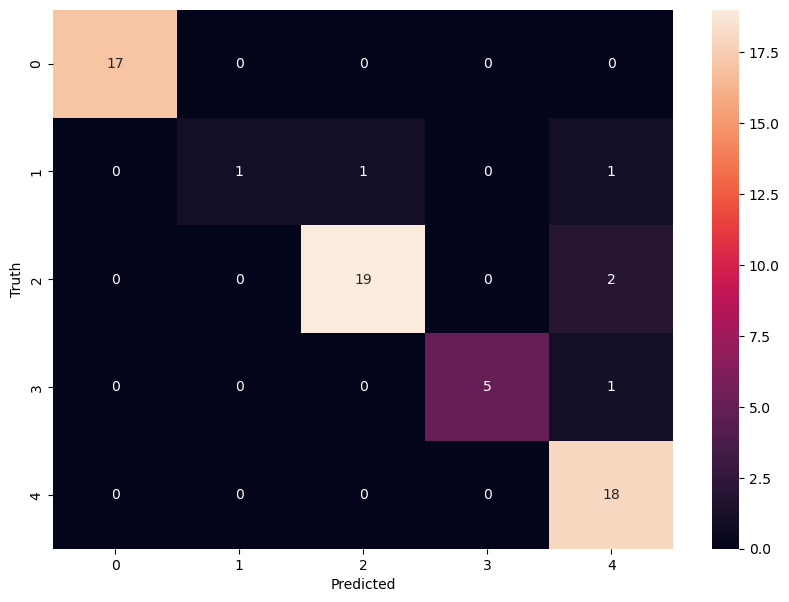

In [68]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
best_clf = best_estimators['logistic_regression']

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  0,  0,  2,  0],
       [ 0,  2,  0,  0,  1],
       [ 0,  1, 18,  2,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  1,  0,  2, 15]])

Text(95.72222222222221, 0.5, 'Truth')

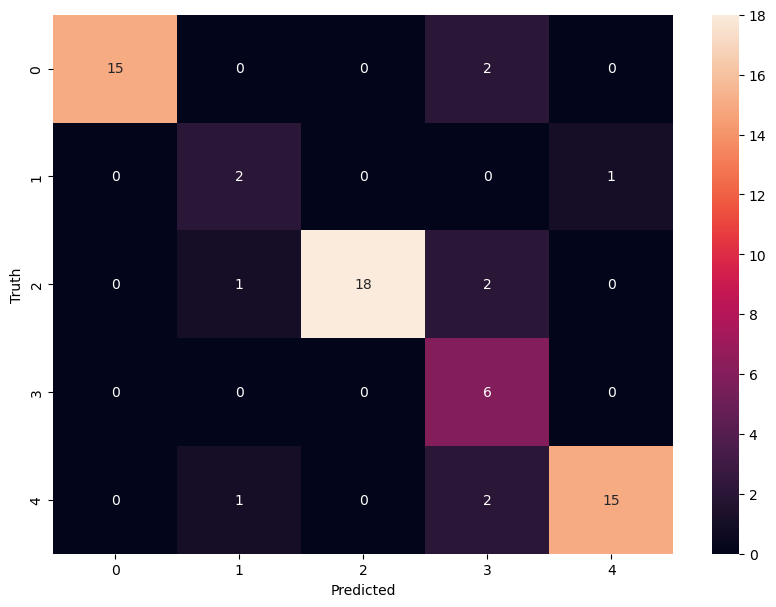

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
class_dict

{'virat kohli': 0,
 'roger federer': 1,
 'lionel messi': 2,
 'tiger woods': 3,
 'vishwanathan anand': 4}

In [73]:
!pip install joblib
import joblib 
joblib.dump(best_clf2, 'saved_model.pkl') 

['saved_model.pkl']

In [74]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))